In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re 

In [3]:
pwd

'/Users/annabeteta/Documents/IRONHACK/bootcamp/Project'

In [4]:
data=pd.read_csv("archive/alldata.csv")

In [5]:
data.head(20)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [6]:
data.shape

(6964, 5)

+ We noticed the "reviews" collumn has many nulls. Let's replace them with 0
+ Also let's delete any row with all null values

In [7]:
data['reviews'] = data['reviews'].fillna(0) #replace null values with 0.
data.head()
data = data.dropna(axis=0, how = 'any') #remove rows with all null values
sum(data.isnull().any(axis=1)) # check if the removal is successful

0

In [8]:
data.shape

(6953, 5)

In [9]:
data["location"].unique()

array(['Atlanta, GA 30301 ', 'Atlanta, GA', 'Atlanta, GA 30303 ',
       'Atlanta, GA 30318 ', 'Atlanta, GA 30338', 'Atlanta, GA 30309 ',
       'Atlanta, GA 30329', 'Atlanta, GA 30328', 'Atlanta, GA 30313 ',
       'Atlanta, GA 30306 ', 'Atlanta, GA 30327 ', 'Atlanta, GA 30322',
       'Atlanta, GA 30319', 'Atlanta, GA 30342 ', 'Atlanta, GA 30308 ',
       'Atlanta, GA 30341', 'Atlanta, GA 30326 ', 'Atlanta, GA 30361 ',
       'Atlanta, GA 30363 ', 'Atlanta, GA 30332 ', 'Atlanta, GA 30345',
       'Atlanta, GA 30350', 'Atlanta, GA 30339', 'Austin, TX',
       'Austin, TX 78746', 'Austin, TX 78701', 'Austin, TX 78759',
       'Round Rock, TX 78664', 'Cedar Park, TX 78613', 'Austin, TX 78702',
       'Austin, TX 78754', 'Austin, TX 78751', 'Austin, TX 73344',
       'Austin, TX 78731', 'Austin, TX 78716', 'Austin, TX 78729',
       'Austin, TX 78758', 'Austin, TX 78769', 'Austin, TX 78753',
       'Austin, TX 78703', 'Austin, TX 78744', 'Austin, TX 78723',
       'Austin, TX 78747', 'Au

In [10]:
#Stract the pattern
#everytime it is not digit or everytime is a digit
# cheatsheet: not digit = \D
# ? --> every time
#start collecting when its not a digit and the stop when its not a digit
data["location"].str.extract(r"([\D]+ ?[\D]+, \D\D)")

,0
0,"Atlanta, GA"
1,"Atlanta, GA"
2,"Atlanta, GA"
3,"Atlanta, GA"
4,"Atlanta, GA"
...,...
6959,"Sunnyvale, CA"
6960,"Sunnyvale, CA"
6961,"Sunnyvale, CA"
6962,"Sunnyvale, CA"


In [11]:
data['city,state']=data['location'].str.extract(r'([\D]+ ?[\D]+, \D\D)')

In [12]:
data['city,state'].unique()

array(['Atlanta, GA', 'Austin, TX', 'Round Rock, TX', 'Cedar Park, TX',
       'Boulder, CO', 'Boston, MA', 'Chicago, IL', 'Washington, DC',
       'Los Angeles, CA', 'Cambridge, MA', 'Mountain View, CA',
       'Manhattan, NY', 'New York, NY', 'Jersey City, NJ', 'Newark, NJ',
       'Oakland, NJ', 'Bronx, NY', 'Hoboken, NJ', 'Brooklyn, NY',
       'Rutherford, NJ', 'Union, NJ', 'Rahway, NJ', 'Murray Hill, NJ',
       'South Plainfield, NJ', 'Queens, NY', 'Little Falls, NJ',
       'Florham Park, NJ', 'Troy Hills, NJ', 'Bloomfield, NJ',
       'Lynbrook, NY', 'Allendale, NJ', 'Parsippany, NJ',
       'West Orange, NJ', 'Kenilworth, NJ', 'Ridgefield, NJ',
       'Harrison, NY', 'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ',
       'Orangeburg, NY', 'Fairfield, NJ', 'Palisades, NY',
       'Hackensack, NJ', 'Roseland, NJ', 'East Hanover, NJ',
       'Long Beach, NY', 'Whippany, NJ', 'Manhasset, NY', 'Yonkers, NY',
       'New Hyde Park, NY', 'Secaucus, NJ', 'Port Washington, NY',
    

In [13]:
data["state"] = data['city,state'].str[-2:]

In [14]:
data.head()

,position,company,description,reviews,location,"city,state",state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA


In [15]:
data["city"] = data['city,state'].str[:-4]
data.head(60)

,position,company,description,reviews,location,"city,state",state,city
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",GA,Atlanta
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,Atlanta
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318","Atlanta, GA",GA,Atlanta
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318","Atlanta, GA",GA,Atlanta
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338","Atlanta, GA",GA,Atlanta


In [16]:
data["city"].unique()

array(['Atlanta', 'Austin', 'Round Rock', 'Cedar Park', 'Boulder',
       'Boston', 'Chicago', 'Washington', 'Los Angeles', 'Cambridge',
       'Mountain View', 'Manhattan', 'New York', 'Jersey City', 'Newark',
       'Oakland', 'Bronx', 'Hoboken', 'Brooklyn', 'Rutherford', 'Union',
       'Rahway', 'Murray Hill', 'South Plainfield', 'Queens',
       'Little Falls', 'Florham Park', 'Troy Hills', 'Bloomfield',
       'Lynbrook', 'Allendale', 'Parsippany', 'West Orange', 'Kenilworth',
       'Ridgefield', 'Harrison', 'Montclair', 'Fort Lee', 'Carlstadt',
       'Orangeburg', 'Fairfield', 'Palisades', 'Hackensack', 'Roseland',
       'East Hanover', 'Long Beach', 'Whippany', 'Manhasset', 'Yonkers',
       'New Hyde Park', 'Secaucus', 'Port Washington', 'Staten Island',
       'Short Hills', 'Manhattanville', 'Woodcliff Lake', 'Redmond',
       'San Diego', 'Bedminster', 'New Brunswick', 'Seattle',
       'San Francisco', 'Redwood City', 'San Mateo', 'Berkeley',
       'San Francisco Bay A

In [17]:
data["state"].unique()

array(['GA', 'TX', 'CO', 'MA', 'IL', 'DC', 'CA', 'NY', 'NJ', 'WA'],
      dtype=object)

<AxesSubplot:>

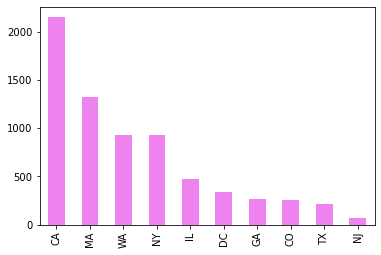

In [18]:
data["state"].value_counts().plot(kind = 'bar', color='violet')

In [19]:
#top_10_cities = data['city'].value_counts()[:10].sort_values(ascending=False)
#top_10_cities.plot(kind = 'bar', color='red')

<AxesSubplot:>

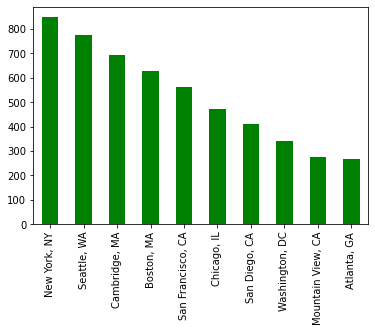

In [20]:
top_10_city_state = data['city,state'].value_counts()[:10].sort_values(ascending=False)
top_10_city_state.plot(kind = 'bar', color='green')

## 2. Position

In [21]:
data["position"].unique()

array(['Development Director',
       'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
       'Data Scientist', ..., 'Data Developer / Machine Learning Analyst',
       'Intern Scientist', 'Principal Data Scientist, Deep Learning'],
      dtype=object)

In [22]:
#the key to this one is junst to look for specific words
#useful methods:

#re.ignorecase

data["position"].str.findall("data scientist", flags=re.IGNORECASE)

0                     []
1                     []
2       [Data Scientist]
3                     []
4                     []
              ...       
6959                  []
6960                  []
6961                  []
6962                  []
6963    [Data Scientist]
Name: position, Length: 6953, dtype: object

In [23]:
data["ds yes"] = data["position"].str.count("data scientist", flags=re.IGNORECASE)

In [24]:
data.head()

,position,company,description,reviews,location,"city,state",state,city,ds yes
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",GA,Atlanta,0
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,0
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,1
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,Atlanta,0
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,0


In [25]:
data["ds yes"].value_counts()

0    5692
1    1252
2       9
Name: ds yes, dtype: int64

In [26]:
#list of junior, mgr, director, assitant, mid-level...
#with the for loop that contains any of them


#we see data scientist seems to be consistently written but, to look for sth like analysis or analyst we can use regex

In [27]:
data["description"].head(20)

0     Development Director\nALS Therapy Development ...
1     Job Description\n\n"The road that leads to acc...
2     Growing company located in the Atlanta, GA are...
3     DEPARTMENT: Program OperationsPOSITION LOCATIO...
4     DESCRIPTION\nThe Emory University Department o...
5     Qualifications\nBachelor’s degree in Computer ...
6     Qualifications\nBachelor’s degree\n5-7 years o...
7     Overview / Responsibilities\nWood Environment ...
8     Works closely with senior CIB professionals. P...
9     Known for being a great place to work and buil...
10    :\n\nThe Statistical Forecast Analyst position...
11    Chenega Professional &amp; Technical Services,...
12    Innovate. Collaborate. Shine. Lighthouse — KPM...
13    DESCRIPTION\nUnder minimal supervision, the As...
14    Data Science Analyst– Business Intelligence\nL...
15    Cotiviti is looking for an industry leading Da...
16    Description\nExecutes complex assignments requ...
17    Overview\n\n\n\nAt Perficient you’ll deliv

In [28]:
#use regex to pull out the new lines (\n) and special charcters
#and also to pull out the years of experience --> well maybe it does not work as there values like 5-7 years!!
#matches=re.findall("\d+")

#not working: data['description'].str.extract(r"(\d+)["years"])

In [29]:
#data["experience_years"].str.findall(r"\d+\s\w+")

In [30]:
data["experience_years"] = data["description"].str.findall(r"\d+\s\w+")
data.head()
                

,position,company,description,reviews,location,"city,state",state,city,ds yes,experience_years
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",GA,Atlanta,0,[8 years]
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,0,[]
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,1,[]
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,Atlanta,0,"[25 years, 00 to, 2 yearsbasic, 2 yearsProgram..."
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,0,[10 of]


In [31]:
data["experience_years"] = data["description"].str.findall(r"\d+\s\w+|[\d]+\S?[\d]+\s\w+"+"years")
data.head()
                                                        

,position,company,description,reviews,location,"city,state",state,city,ds yes,experience_years
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",GA,Atlanta,0,[8 years]
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,0,[]
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,1,[]
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,Atlanta,0,"[25 years, 00 to, 2 yearsbasic, 2 yearsProgram..."
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta,0,[10 of]


In [32]:
comps=data["company"].value_counts()
comps

Amazon.com                         358
Ball Aerospace                     187
Microsoft                          137
Google                             134
NYU Langone Health                  77
                                  ... 
Aptus Health                         1
Stevens Institute of Technology      1
iHeartMedia, Inc.                    1
Sartorius                            1
Asimov                               1
Name: company, Length: 2213, dtype: int64

In [33]:
top_10_companies = data["company"].value_counts()[:10].sort_values(ascending=False)

In [34]:
top_10_companies

Amazon.com                                358
Ball Aerospace                            187
Microsoft                                 137
Google                                    134
NYU Langone Health                         77
Fred Hutchinson Cancer Research Center     70
KPMG                                       66
Lab126                                     50
Facebook                                   49
Broad Institute                            49
Name: company, dtype: int64

<AxesSubplot:>

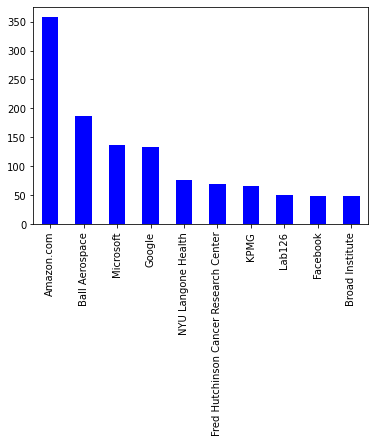

In [35]:
top_10_companies.plot(kind = "bar", color="blue")

## A) Major insights: frequency, most wanted...

In [36]:
major_list = ['computer science','data science','statistics',
            'mathematics','economics','liberal arts','business','engineering','psychology','biology','medicine',
            'marketing','business analysis','chemical engineering','chemistry',
            'public health','public relations']
len(major_list)

17

Notice the difference!
- Cuando pongo .value_counts() me hace recuento de los que hacen match (true) y los que no (false)
- En cambio, si pongo .sum() me suma cada vez que encuentra el q hace match, es decir, me muestra directamente los que serían true

In [37]:
#using .value_counts() and creating a list:
frequency=[]

for m in major_list:
    counter = data["description"].str.lower().str.contains(m).value_counts()
    #print(counter)
    frequency.append(counter)

frequency

[False    4550
 True     2403
 Name: description, dtype: int64,
 False    5378
 True     1575
 Name: description, dtype: int64,
 False    4843
 True     2110
 Name: description, dtype: int64,
 False    5769
 True     1184
 Name: description, dtype: int64,
 False    6323
 True      630
 Name: description, dtype: int64,
 False    6951
 True        2
 Name: description, dtype: int64,
 True     3852
 False    3101
 Name: description, dtype: int64,
 False    3651
 True     3302
 Name: description, dtype: int64,
 False    6831
 True      122
 Name: description, dtype: int64,
 False    5965
 True      988
 Name: description, dtype: int64,
 False    6364
 True      589
 Name: description, dtype: int64,
 False    5785
 True     1168
 Name: description, dtype: int64,
 False    6876
 True       77
 Name: description, dtype: int64,
 False    6841
 True      112
 Name: description, dtype: int64,
 False    6316
 True      637
 Name: description, dtype: int64,
 False    6747
 True      206
 Name: des

In [38]:
#using .sum() and creating a list:

frequency=[]
for m in major_list:
    counter = data["description"].str.lower().str.contains(m).sum()
    frequency.append(counter)

frequency

[2403,
 1575,
 2110,
 1184,
 630,
 2,
 3852,
 3302,
 122,
 988,
 589,
 1168,
 77,
 112,
 637,
 206,
 23]

- If I wanted to create a dictionary instead of getting directly the list with the sum of the matches, i'd have done this:

In [39]:
#major_freq = {}

#for m in major_list:
#    counter = data["description"].str.lower().str.contains(m).sum()
#    major_freq[m] = counter

#major_freq

In [40]:
#maybe I wanna display the majors sorted, but you cannot
#apply .sort_values to a dictionary, you have to apply it ot a series

#major_freq_series = pd.Series(major_freq)

#major_freq_series.sort_values(ascending=False).head()

## Creating the data frame and storing it to a .csv

In [41]:
major_df=pd.DataFrame()
major_df["major"]  = major_list
major_df["major_freq"]  = frequency

In [42]:
major_df.head(20)

,major,major_freq
0,computer science,2403
1,data science,1575
2,statistics,2110
3,mathematics,1184
4,economics,630
5,liberal arts,2
6,business,3852
7,engineering,3302
8,psychology,122
9,biology,988


In [43]:
major_df.shape

(17, 2)

In [44]:
#nos guardamos este dataframe en un cvs para abrilo después en tableau:
major_df.to_csv("major_df.csv")


## Creating a pie chart with matplotlib

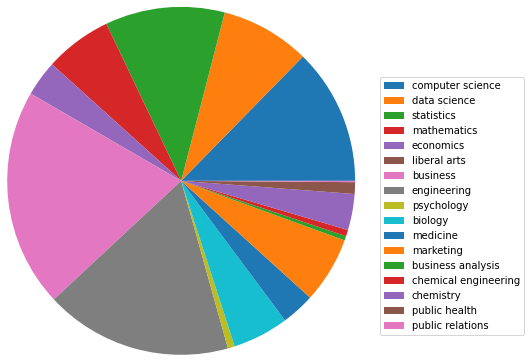

In [45]:
plt.pie(major_df["major_freq"], radius=2)
plt.legend(labels= major_df["major"],loc="best", bbox_to_anchor=(1, 0.5, 1.1, 0.5))
plt.show()

## B) Position insights: comparison between fields

#### Comparing Data Science vs. Data Analytics vs. Data Engineering

In [46]:
lower_position = data['position'].str.lower()

In [47]:
#comparing fields in Data
data_science=0
data_analytics=0
data_engineering=0

for position in lower_position:
    if "data scientist" in position or 'data science' in position or "machine learning" in position:
        #category.append('data science')
        data_science+=1
    elif "analyst" in position or "analytics" in position or "analysis" in position:
        #category.append('analyst')
        data_analytics+=1
    elif "data engineer" in position or "artificial intelligence" in position or "ai" in position or " data engineering" in position:
        #category.append('data engineer')
        data_engineering+=1
    #else:
        #category.append('other')

print(data_science)
print(data_analytics)
print(data_engineering)

1919
1020
314


In [48]:
position_field_freq=[data_science,data_analytics,data_engineering]
position_field_freq

[1919, 1020, 314]

In [49]:
position_field=["Data Science","Data Analytics","Data Engineering"]
#position_field_freq=list(data_science,data_analytics,data_engineering)

position_df=pd.DataFrame()
position_df["position field"]  = position_field
position_df["position field freq"]  = position_field_freq

position_df.head()

,position field,position field freq
0,Data Science,1919
1,Data Analytics,1020
2,Data Engineering,314


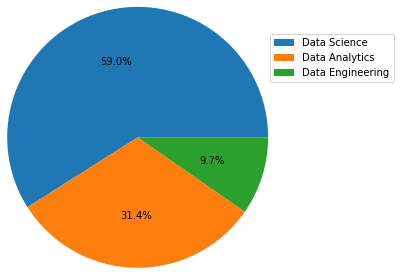

In [50]:
plt.pie(position_df["position field freq"], radius=1.5, autopct='%1.1f%%')
plt.legend(labels= position_df["position field"],loc="best", bbox_to_anchor=(1, 0.5, 0.7, 0.5))
plt.show()

In [51]:
#with labels inside
#plt.pie(position_df["position field freq"], labels = position_df["position field"],autopct='%1.1f%%')
#plt.show()

#### Comparing Other vs. Data Science vs. Data Analytics vs. Data Engineering

In [52]:
#comparing fields data fields vs. other
data_science=0
data_analytics=0
data_engineering=0
other=0

for position in lower_position:
    if "data scientist" in position or 'data science' in position or "machine learning" in position:
        #category.append('data science')
        data_science+=1
    elif "analyst" in position or "analytics" in position or "analysis" in position:
        #category.append('analyst')
        data_analytics+=1
    elif "data engineer" in position or "artificial intelligence" in position or "ai" in position or " data engineering" in position:
        #category.append('data engineer')
        data_engineering+=1
    else:
        other+=1

print(data_science)
print(data_analytics)
print(data_engineering)
print(other)

1919
1020
314
3700


In [53]:
position_field_freq2=[data_science,data_analytics,data_engineering,other]
position_field_freq2

[1919, 1020, 314, 3700]

In [54]:
position_field2=["Data Science","Data Analytics","Data Engineering","other"]
#position_field_freq=list(data_science,data_analytics,data_engineering)

position_df2=pd.DataFrame()
position_df2["position field"]  = position_field2
position_df2["position field freq"]  = position_field_freq2

position_df.head()

,position field,position field freq
0,Data Science,1919
1,Data Analytics,1020
2,Data Engineering,314


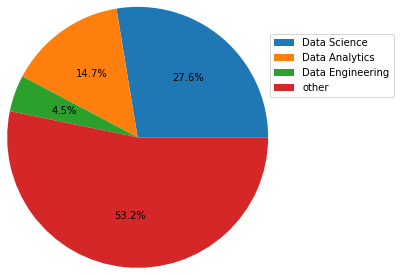

In [55]:
plt.pie(position_df2["position field freq"], radius=1.5, autopct='%1.1f%%')
plt.legend(labels= position_df2["position field"],loc="best", bbox_to_anchor=(1, 0.5, 0.7, 0.5))
plt.show()